In [2]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения графиков в ноутбуке (если используете Jupyter)
%matplotlib inline

In [57]:
from glob import glob

In [59]:
sorted(glob('logs_*.parquet'))

['logs_df_2024-07-08.parquet',
 'logs_df_2024-07-09.parquet',
 'logs_df_2024-07-10.parquet',
 'logs_df_2024-07-11.parquet',
 'logs_df_2024-07-12.parquet',
 'logs_df_2024-07-13.parquet',
 'logs_df_2024-07-14.parquet',
 'logs_df_2024-07-15.parquet',
 'logs_df_2024-07-16.parquet',
 'logs_df_2024-07-17.parquet',
 'logs_df_2024-07-18.parquet',
 'logs_df_2024-07-19.parquet',
 'logs_df_2024-07-20.parquet',
 'logs_df_2024-07-21.parquet',
 'logs_df_2024-07-22.parquet',
 'logs_df_2024-07-23.parquet',
 'logs_df_2024-07-24.parquet',
 'logs_df_2024-07-25.parquet',
 'logs_df_2024-07-26.parquet',
 'logs_df_2024-07-27.parquet',
 'logs_df_2024-07-28.parquet',
 'logs_df_2024-07-29.parquet',
 'logs_df_2024-07-30.parquet',
 'logs_df_2024-07-31.parquet',
 'logs_df_2024-08-01.parquet',
 'logs_df_2024-08-02.parquet',
 'logs_df_2024-08-03.parquet',
 'logs_df_2024-08-04.parquet',
 'logs_df_2024-08-05.parquet',
 'logs_df_2024-08-06.parquet']

In [60]:
dfs = [ ]
for path in sorted(glob('logs_*.parquet')):
    df = pd.read_parquet(path)
    dfs.append(df)

In [61]:
logs = pd.concat(dfs)

In [62]:
logs.shape

(604366870, 6)

In [63]:
video_stat = pd.read_parquet('video_stat.parquet')

In [ ]:
data = pd.merge(logs, video_stat, on='video_id', how='left')

In [2]:
# # Загрузка данных из файлов
# logs_05 = pd.read_parquet('logs_df_2024-08-05.parquet')
# logs_06 = pd.read_parquet('logs_df_2024-08-06.parquet')
# logs = pd.concat([logs_05, logs_06])

In [4]:
video_stat = pd.read_parquet('video_stat.parquet')

In [38]:
video_stat['v_duration'].describe()

count    1.555687e+06
mean     1.126346e+03
std      3.097042e+03
min      0.000000e+00
25%      1.439180e+02
50%      3.810000e+02
75%      1.259834e+03
max      2.147484e+06
Name: v_duration, dtype: float64

In [5]:
logs.shape

(64597121, 6)

In [6]:
# Преобразование временных меток в формат datetime
logs['event_timestamp'] = pd.to_datetime(logs['event_timestamp'])
video_stat['v_pub_datetime'] = pd.to_datetime(video_stat['v_pub_datetime'])

# Приведение ID к строковому типу (если необходимо)
logs['video_id'] = logs['video_id'].astype(str)
logs['user_id'] = logs['user_id'].astype(str)
video_stat['video_id'] = video_stat['video_id'].astype(str)

In [7]:
# Проверка пропущенных значений в logs
print("Пропущенные значения в logs:")
print(logs.isnull().sum())

# Проверка пропущенных значений в video_stat
print("\nПропущенные значения в video_stat:")
print(video_stat.isnull().sum())

Пропущенные значения в logs:
event_timestamp    0
user_id            0
region             0
city               0
video_id           0
watchtime          0
dtype: int64

Пропущенные значения в video_stat:
video_id                                 0
v_pub_datetime                           0
v_total_comments                         0
v_year_views                             0
v_month_views                            0
v_week_views                             0
v_day_views                              0
v_likes                                  0
v_dislikes                               0
v_duration                               0
v_cr_click_like_7_days                   0
v_cr_click_dislike_7_days                0
v_cr_click_vtop_7_days                   0
v_cr_click_long_view_7_days              0
v_cr_click_comment_7_days                0
v_cr_click_like_30_days                  0
v_cr_click_dislike_30_days               0
v_cr_click_vtop_30_days                  0
v_cr_click_long_view_3

In [8]:
data = pd.merge(logs, video_stat, on='video_id', how='left')

Статистики по количеству взаимодействий пользователей в день:
count    2.007578e+07
mean     3.217664e+00
std      2.472395e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.121500e+04
Name: interactions, dtype: float64


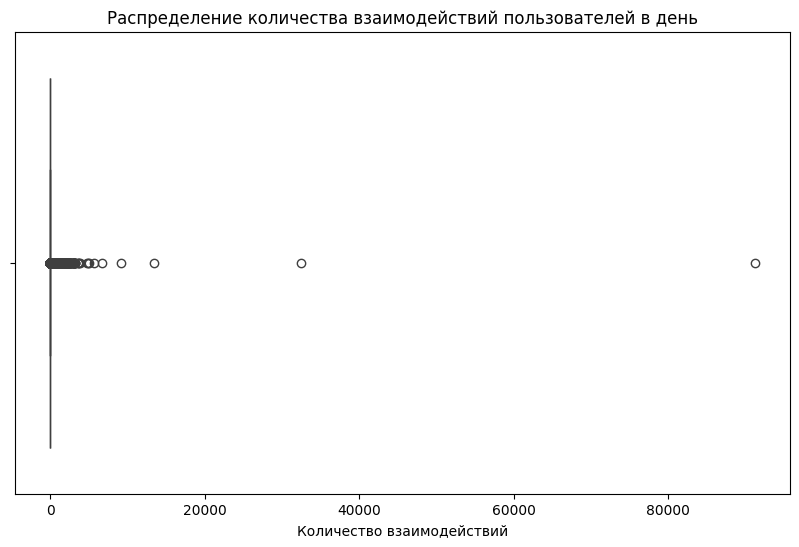

In [9]:
data['event_date'] = data['event_timestamp'].dt.date

user_interactions = data.groupby(['user_id', 'event_date']).size().reset_index(name='interactions')

print("Статистики по количеству взаимодействий пользователей в день:")
print(user_interactions['interactions'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=user_interactions['interactions'])
plt.title('Распределение количества взаимодействий пользователей в день')
plt.xlabel('Количество взаимодействий')
plt.show()

Количество уникальных видео по категориям:
                     category_id  video_count
28                        Разное       479295
30                       Сериалы        96044
33                  Телепередачи        94876
6                      Видеоигры        86695
17                        Музыка        77682
27                   Развлечения        77179
36                        Фильмы        60323
15                     Лайфстайл        50436
7                          Детям        48468
22                      Обучение        48440
1                      Авто-мото        40322
39                          Юмор        38267
9                            Еда        32254
18                   Мультфильмы        28811
31                         Спорт        28687
34        Техника и оборудование        21319
12                      Интервью        21221
37                         Хобби        19881
35         Технологии и интернет        19056
26                   Путешествия     

/tmp/ipykernel_474473/3348818895.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=videos_per_category, x='category_id', y='video_count', palette='viridis')


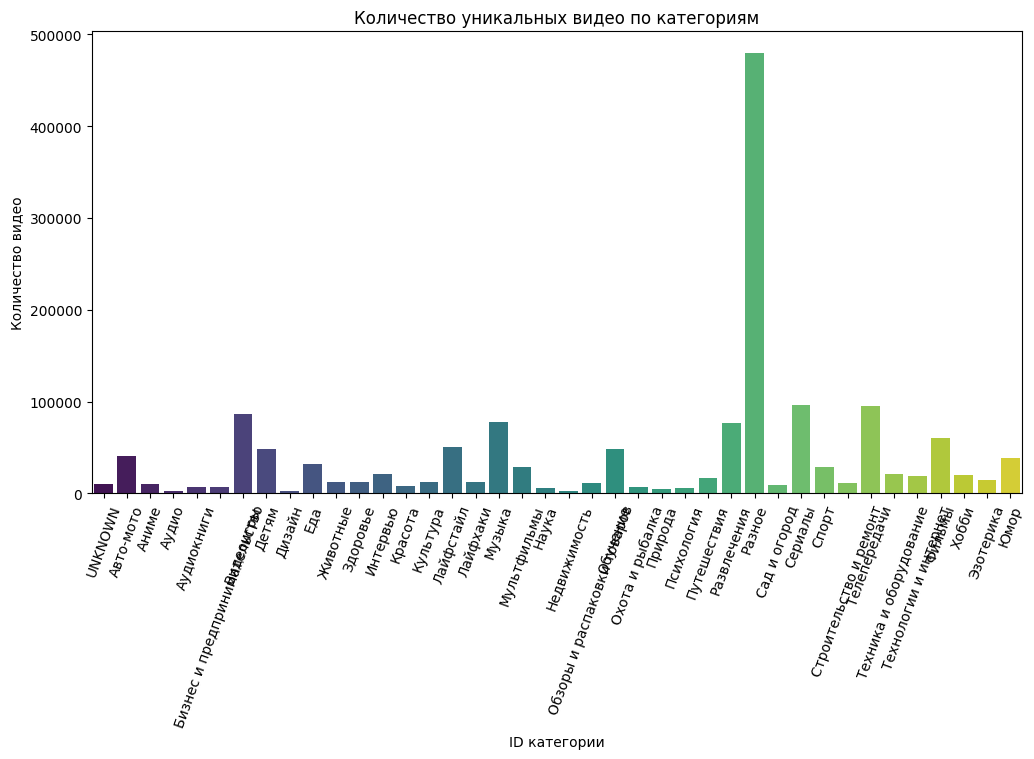

In [13]:
# Количество уникальных видео в каждой категории
videos_per_category = video_stat.groupby('category_id')['video_id'].nunique().reset_index(name='video_count')

print("Количество уникальных видео по категориям:")
print(videos_per_category.sort_values('video_count', ascending=False))

# Визуализация распределения видео по категориям
plt.figure(figsize=(12, 6))
sns.barplot(data=videos_per_category, x='category_id', y='video_count', palette='viridis')
plt.xticks(rotation=70)
plt.title('Количество уникальных видео по категориям')
plt.xlabel('ID категории')
plt.ylabel('Количество видео')
plt.show()


Количество просмотров по категориям:
                     category_id  v_year_views
33                  Телепередачи    1315424901
27                   Развлечения     528490046
30                       Сериалы     437878810
28                        Разное     342165585
22                      Обучение     311039792
36                        Фильмы     299535537
15                     Лайфстайл     216191222
6                      Видеоигры     139452362
9                            Еда     126494442
39                          Юмор     110818380
7                          Детям      81987917
26                   Путешествия      76528042
17                        Музыка      76173460
31                         Спорт      72858432
1                      Авто-мото      68045617
18                   Мультфильмы      65914198
12                      Интервью      65893264
11                      Здоровье      41833156
2                          Аниме      41329910
37                     

/tmp/ipykernel_474473/1320296426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=views_per_category, x='category_id', y='v_year_views', palette='magma')


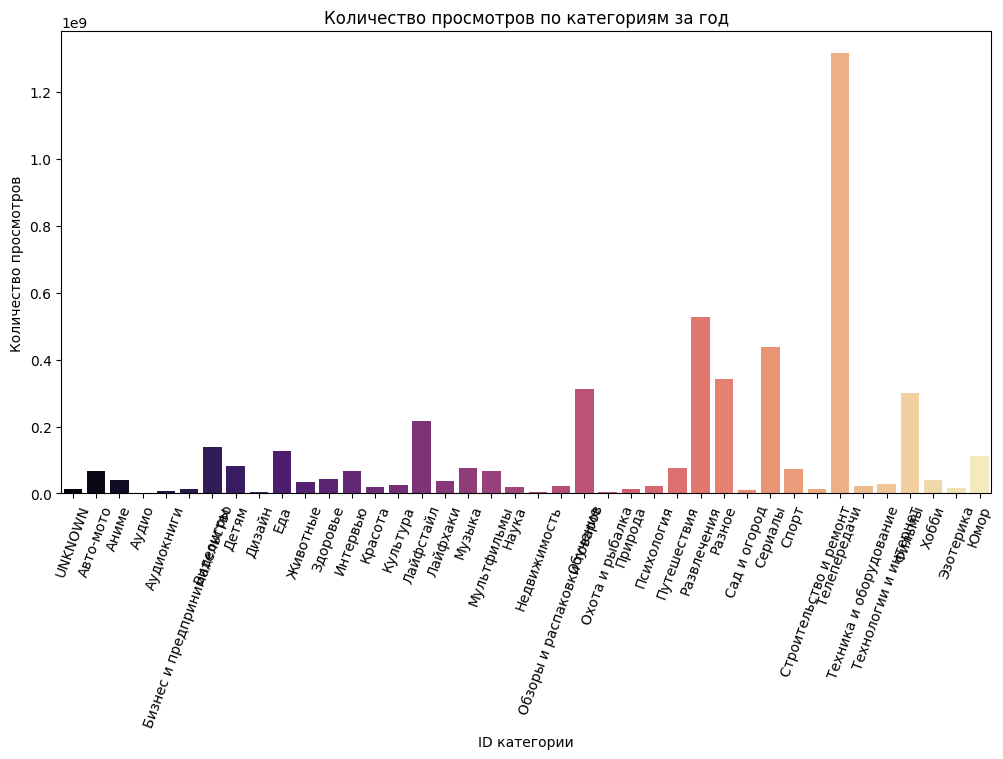

In [12]:
# Суммарное количество просмотров (плеер стартов) за год по категориям
views_per_category = video_stat.groupby('category_id')['v_year_views'].sum().reset_index()

print("Количество просмотров по категориям:")
print(views_per_category.sort_values('v_year_views', ascending=False))

# Визуализация просмотров по категориям
plt.figure(figsize=(12, 6))
sns.barplot(data=views_per_category, x='category_id', y='v_year_views', palette='magma')
plt.xticks(rotation=70)
plt.title('Количество просмотров по категориям за год')
plt.xlabel('ID категории')
plt.ylabel('Количество просмотров')
plt.show()


Статистики по количеству просмотров у авторов:
count    2.298900e+05
mean     2.081040e+04
std      1.719502e+06
min      1.010000e+02
25%      1.630000e+02
50%      3.820000e+02
75%      1.334000e+03
max      6.625645e+08
Name: v_year_views, dtype: float64


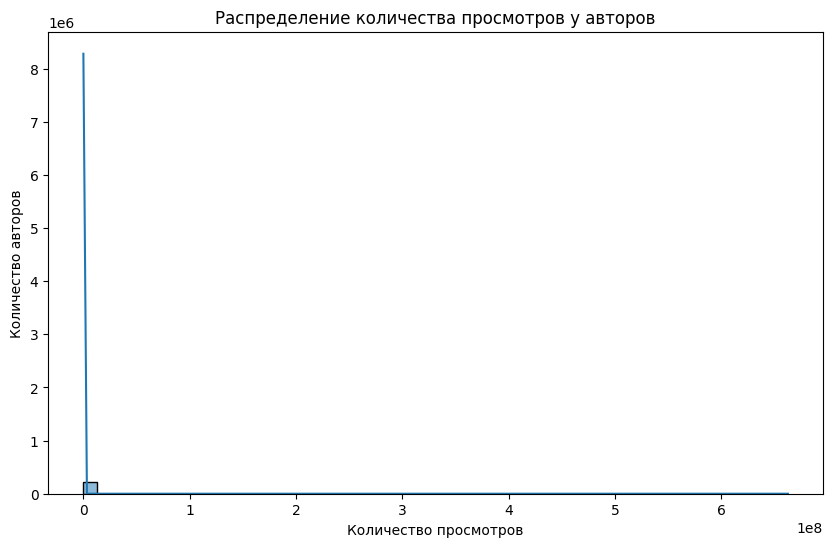

In [14]:
# Суммарное количество просмотров по авторам
views_per_author = video_stat.groupby('author_id')['v_year_views'].sum().reset_index()

# Статистики по просмотрам авторов
print("Статистики по количеству просмотров у авторов:")
print(views_per_author['v_year_views'].describe())

# Визуализация распределения просмотров у авторов
plt.figure(figsize=(10, 6))
sns.histplot(views_per_author['v_year_views'], bins=50, kde=True)
plt.title('Распределение количества просмотров у авторов')
plt.xlabel('Количество просмотров')
plt.ylabel('Количество авторов')
plt.show()


In [28]:
data.columns

Index(['event_timestamp', 'user_id', 'region', 'city', 'video_id', 'watchtime',
       'v_pub_datetime', 'v_total_comments', 'v_year_views', 'v_month_views',
       'v_week_views', 'v_day_views', 'v_likes', 'v_dislikes', 'v_duration',
       'v_cr_click_like_7_days', 'v_cr_click_dislike_7_days',
       'v_cr_click_vtop_7_days', 'v_cr_click_long_view_7_days',
       'v_cr_click_comment_7_days', 'v_cr_click_like_30_days',
       'v_cr_click_dislike_30_days', 'v_cr_click_vtop_30_days',
       'v_cr_click_long_view_30_days', 'v_cr_click_comment_30_days',
       'v_cr_click_like_1_days', 'v_cr_click_dislike_1_days',
       'v_cr_click_vtop_1_days', 'v_cr_click_long_view_1_days',
       'v_cr_click_comment_1_days', 'v_is_hidden', 'v_is_deleted',
       'v_avg_watchtime_1_day', 'v_avg_watchtime_7_day',
       'v_avg_watchtime_30_day', 'v_frac_avg_watchtime_1_day_duration',
       'v_frac_avg_watchtime_7_day_duration',
       'v_frac_avg_watchtime_30_day_duration',
       'v_category_popularit

In [29]:
data['rel_watchtime'] = data['watchtime'] / data['v_duration']

In [35]:
data['v_duration'].dropna().describe()

count    5.876381e+07
mean     2.266505e+03
std      3.065010e+03
min      0.000000e+00
25%      1.984430e+02
50%      1.225898e+03
75%      3.218262e+03
max      2.147484e+06
Name: v_duration, dtype: float64

In [33]:
data['rel_watchtime'].dropna().describe()

count    5.846235e+07
mean              inf
std               NaN
min      0.000000e+00
25%      6.486573e-03
50%      1.926816e-01
75%      8.991616e-01
max               inf
Name: rel_watchtime, dtype: float64

In [32]:
data['rel_watchtime'].describe()

count    5.846235e+07
mean              inf
std               NaN
min      0.000000e+00
25%      6.486573e-03
50%      1.926816e-01
75%      8.991616e-01
max               inf
Name: rel_watchtime, dtype: float64

Среднее время просмотра видео: 924.72 секунд


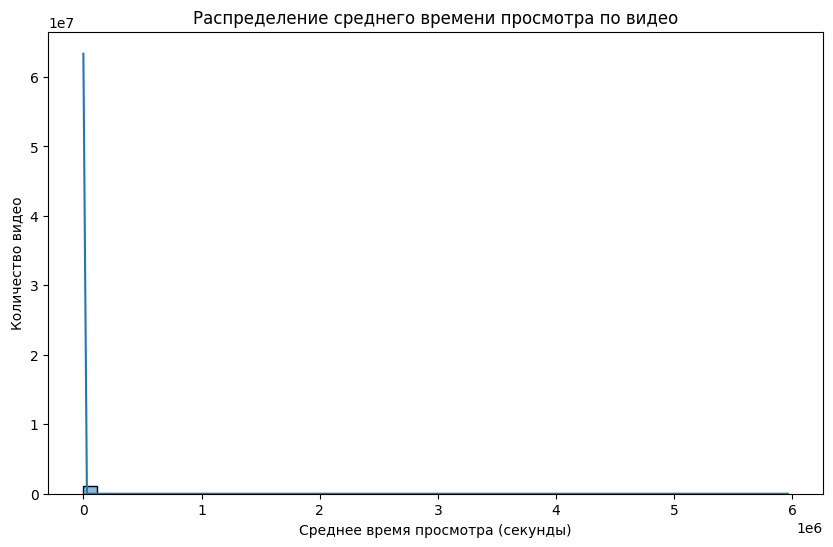

In [15]:
# Расчет среднего времени просмотра видео
average_watchtime = data['watchtime'].mean()
print(f"Среднее время просмотра видео: {average_watchtime:.2f} секунд")

# Распределение среднего watchtime по видео
avg_watchtime_per_video = data.groupby('video_id')['watchtime'].mean().reset_index(name='avg_watchtime')

plt.figure(figsize=(10, 6))
sns.histplot(avg_watchtime_per_video['avg_watchtime'], bins=50, kde=True)
plt.title('Распределение среднего времени просмотра по видео')
plt.xlabel('Среднее время просмотра (секунды)')
plt.ylabel('Количество видео')
plt.show()


Квантили (децели) среднего времени просмотра:
0.1    1.200000e+01
0.2    3.400000e+01
0.3    6.187500e+01
0.4    9.662500e+01
0.5    1.407143e+02
0.6    2.015000e+02
0.7    3.166667e+02
0.8    5.479714e+02
0.9    1.061937e+03
1.0    5.962105e+06
Name: avg_watchtime, dtype: float64


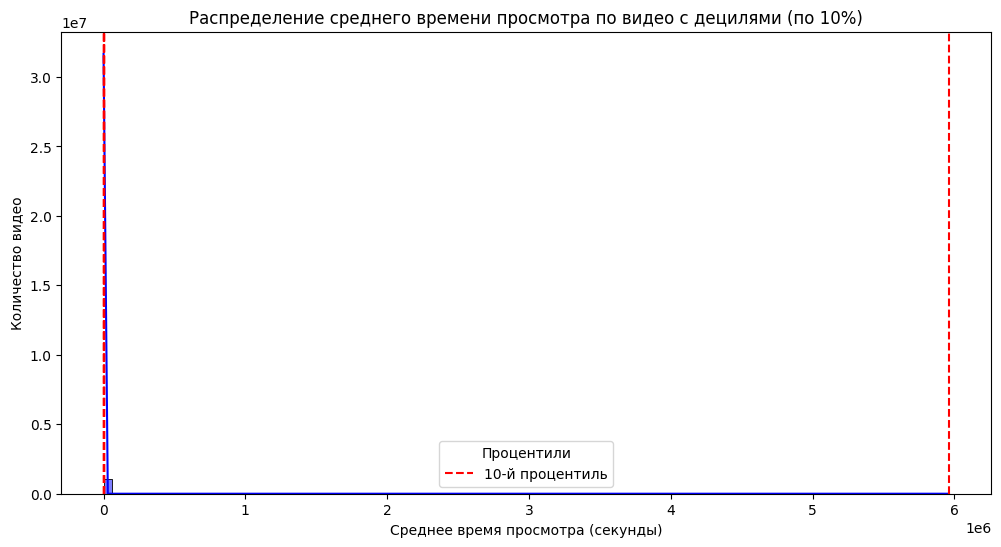

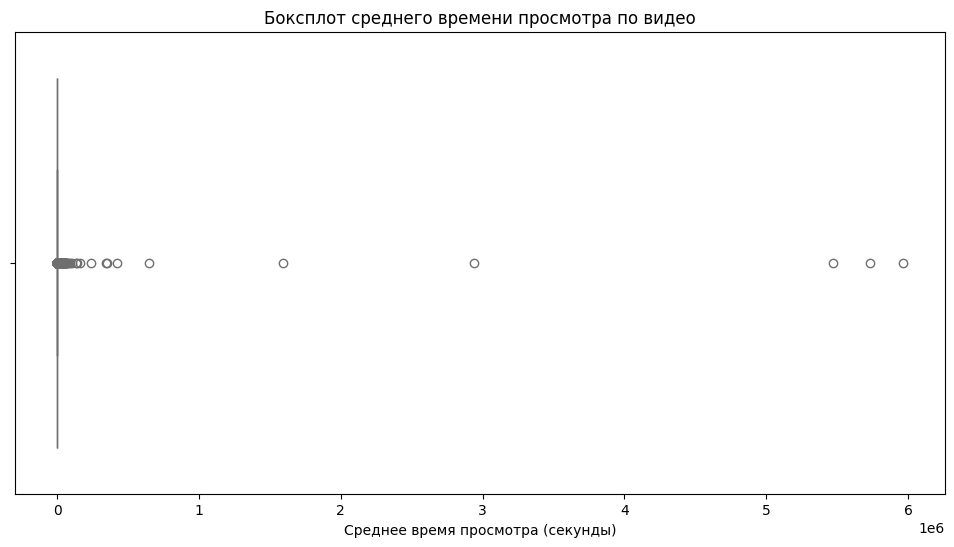

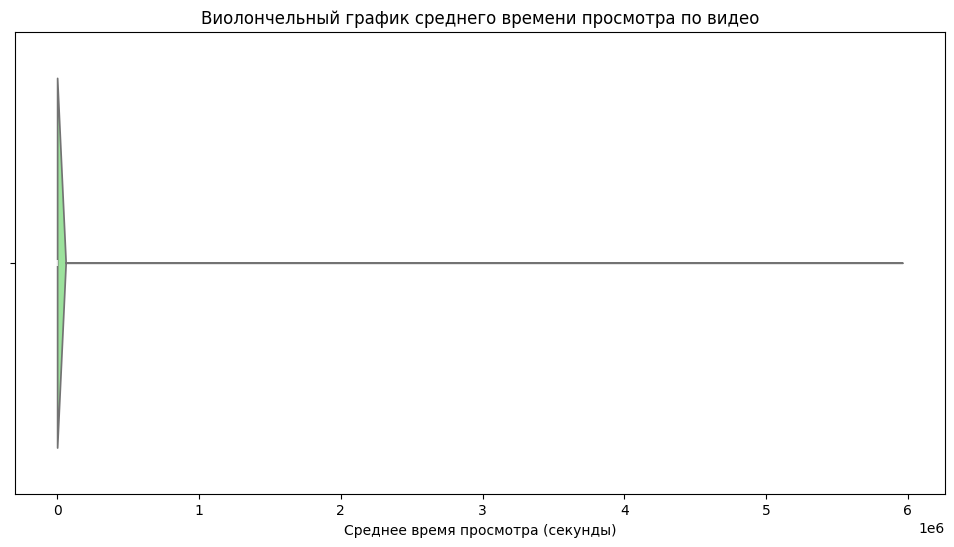

In [45]:
deciles = avg_watchtime_per_video['avg_watchtime'].quantile([0.1 * i for i in range(1, 11)])
print("Квантили (децели) среднего времени просмотра:")
print(deciles)

# Построение графика с квантилизованными разбивками
plt.figure(figsize=(12, 6))
sns.histplot(avg_watchtime_per_video['avg_watchtime'], bins=100, kde=True, color='blue')

# Добавление линий для каждого децили
for i, decile in enumerate(deciles):
    plt.axvline(decile, color='red', linestyle='--', label=f"{int((i+1)*10)}-й процентиль" if i == 0 else "")

# Добавление легенды и подписей
plt.title('Распределение среднего времени просмотра по видео с децилями (по 10%)')
plt.xlabel('Среднее время просмотра (секунды)')
plt.ylabel('Количество видео')
plt.legend(title='Процентили')
plt.show()

# Построение боксплота для визуализации распределения
plt.figure(figsize=(12, 6))
sns.boxplot(x=avg_watchtime_per_video['avg_watchtime'], color='skyblue')
plt.title('Боксплот среднего времени просмотра по видео')
plt.xlabel('Среднее время просмотра (секунды)')
plt.show()

# Построение виолончельного графика для визуализации плотности распределения
plt.figure(figsize=(12, 6))
sns.violinplot(x=avg_watchtime_per_video['avg_watchtime'], color='lightgreen')
plt.title('Виолончельный график среднего времени просмотра по видео')
plt.xlabel('Среднее время просмотра (секунды)')
plt.show()

In [43]:
avg_watchtime_per_video.describe()

,avg_watchtime
count,1.041576e+06
mean,3.885199e+02
std,1.031914e+04
min,0.000000e+00
25%,4.800000e+01
50%,1.407143e+02
75%,4.110000e+02
max,5.962105e+06


In [55]:
avg_watchtime_per_video['avg_watchtime'].quantile(0.09)

11.0

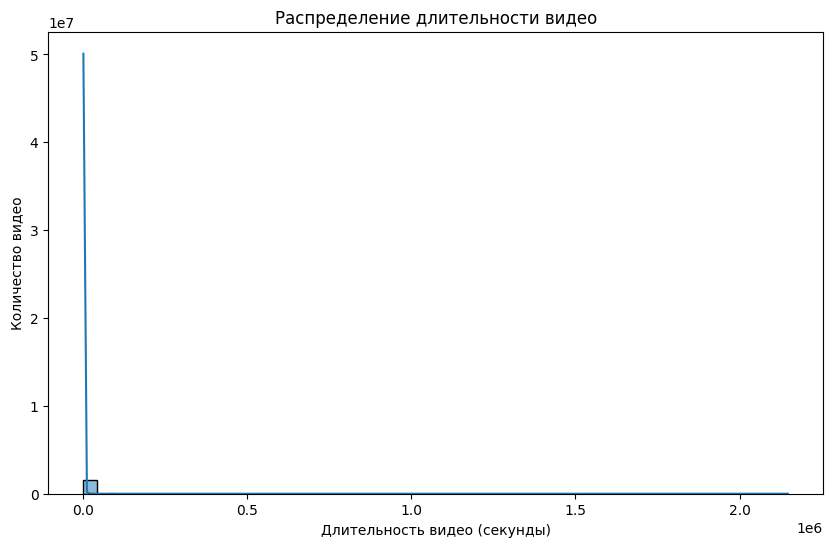

In [37]:
# Распределение длительности видео
plt.figure(figsize=(10, 6))
sns.histplot(video_stat['v_duration'], bins=50, kde=True)
plt.title('Распределение длительности видео')
plt.xlabel('Длительность видео (секунды)')
plt.ylabel('Количество видео')
plt.show()

In [39]:
# Определение "долгих" просмотров согласно заданным правилам
def is_long_view(row):
    duration = row['v_duration']
    watchtime = row['watchtime']
    if duration > 300:
        return watchtime > 0.25 * duration
    else:
        return watchtime > 30

data['is_long_view'] = data.apply(is_long_view, axis=1)

# Процент "долгих" просмотров
long_view_percentage = data['is_long_view'].mean() * 100
print(f"Процент 'долгих' просмотров: {long_view_percentage:.2f}%")

# Распределение "долгих" просмотров по категориям
long_views_per_category = data.groupby('category_id')['is_long_view'].mean().reset_index(name='long_view_rate')

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=long_views_per_category, x='category_id', y='long_view_rate', palette='spring')
plt.title('Процент "долгих" просмотров по категориям')
plt.xlabel('ID категории')
plt.ylabel('Процент "долгих" просмотров')
plt.show()


KeyboardInterrupt



In [ ]:
watchtime_per_category = data.groupby('category_id')['watchtime'].sum().reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=watchtime_per_category, x='category_id', y='watchtime', palette='coolwarm')
plt.title('Суммарный watchtime по категориям')
plt.xlabel('ID категории')
plt.ylabel('Суммарный watchtime (секунды)')
plt.show()

In [42]:
# Определим порог для скипа, например, если пользователь просмотрел менее 10% видео
skip_threshold = 0.1

# Добавляем столбец с долей просмотренного времени по сравнению с длительностью видео
data['watch_fraction'] = data['watchtime'] / data['v_duration']

# Пометим скипы, если доля просмотренного времени меньше порога
data['is_skip'] = data['watch_fraction'] < skip_threshold

user_skips = data.groupby('user_id')['is_skip'].mean().reset_index(name='skip_rate')

# Вывод статистик по проценту скипов среди пользователей
print("Статистика по проценту скипов:")
print(user_skips['skip_rate'].describe())

# Визуализация распределения скипов среди пользователей
plt.figure(figsize=(10, 6))
sns.histplot(user_skips['skip_rate'], bins=50, kde=True)
plt.title('Распределение процента скипов среди пользователей')
plt.xlabel('Процент скипов (доля видео с просмотром менее 10% от длительности)')
plt.ylabel('Количество пользователей')
plt.show()

KeyboardInterrupt: 

/tmp/ipykernel_474473/2670121109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likes_views['likes_per_view'] = likes_views['v_likes'] / likes_views['v_year_views']
/tmp/ipykernel_474473/2670121109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likes_views.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_474473/2670121109.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

Статистики по коэффициенту лайков к просмотрам:
count    1.555687e+06
mean     5.631208e-03
std      3.972883e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.378378e-03
max      1.931707e+01
Name: likes_per_view, dtype: float64


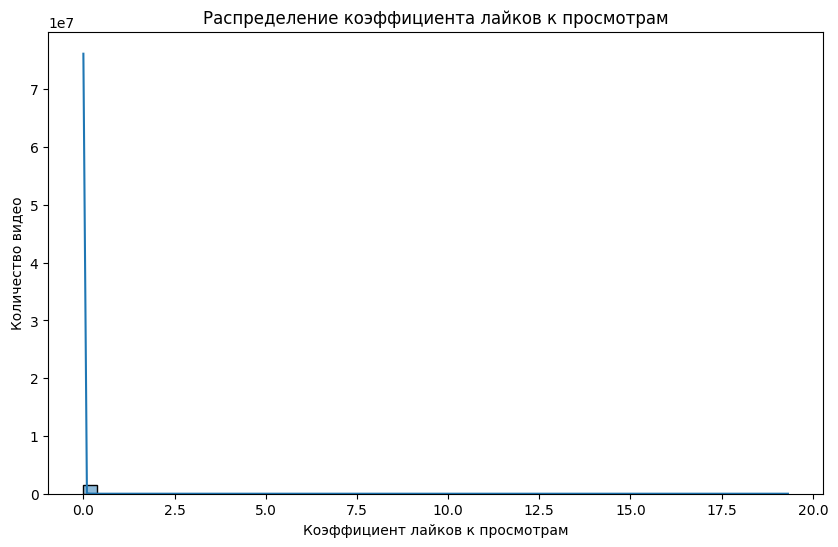

In [16]:
# Объединение данных для сравнения лайков и просмотров
likes_views = video_stat[['video_id', 'v_likes', 'v_year_views']]

# Коэффициент лайков к просмотрам
likes_views['likes_per_view'] = likes_views['v_likes'] / likes_views['v_year_views']

# Удаление бесконечных и NaN значений
likes_views.replace([np.inf, -np.inf], np.nan, inplace=True)
likes_views.dropna(subset=['likes_per_view'], inplace=True)

# Статистики по коэффициенту лайков к просмотрам
print("Статистики по коэффициенту лайков к просмотрам:")
print(likes_views['likes_per_view'].describe())

# Визуализация распределения коэффициента лайков к просмотрам
plt.figure(figsize=(10, 6))
sns.histplot(likes_views['likes_per_view'], bins=50, kde=True)
plt.title('Распределение коэффициента лайков к просмотрам')
plt.xlabel('Коэффициент лайков к просмотрам')
plt.ylabel('Количество видео')
plt.show()